# 비정상 절차서 59-02 : 충전수 유량조절밸브 후단누설

경보 및 증상

자동 동작사항

긴급 조치사항

후속 조치사항

## 1.0 데이터 처리

In [26]:
import pickle
import matplotlib.pyplot as plt
from collections import deque
with open('D:/1.All_python_project/New_CNS_db/ab59_02_1042.pkl', 'rb') as f:
    db = pickle.load(f)
sym_ch = {0:deque(maxlen=5), 1:deque(maxlen=5), 2:deque(maxlen=5), 3:deque(maxlen=5), 4:deque(maxlen=5)
         , 5:deque(maxlen=5),6:deque(maxlen=5), 7:deque(maxlen=5), 8:deque(maxlen=5), 9:deque(maxlen=5)
         , 10:deque(maxlen=5)}

## 2.0 경보 및 증상

### 2.1 CHG FLOW CONT FLOW HI/LO(JP005)

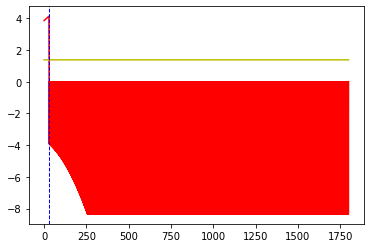

In [60]:
# KLAMPO266 :ALARM: CHARGING FLOW CONT FLOW LOW(5 M3/HR) 
# WCHGNO : NORMAL CHARGING FLOW. (지시계변수)
# ZINST39 : CHARGING FLOW 
# CWCHGL : NORMAL CHARGING FLOW LOW SETPOINT
plt.plot(db['WCHGNO'], color='r')
plt.plot(db['CWCHGL'], color='y')
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

In [24]:
charging_flow = []
for i in range(len(db)):
    if i > 29:
        if db['WCHGNO'][i] < db['CWCHGL'][i]:
            charging_flow.append(i+1)
if len(charging_flow) == 0:
    print('증상을 만족하지 못했습니다.')
else:
    print(f'최초 CHG FLOW CONT FLOW HI/LO 경보 시간 : {charging_flow[0]}초')

최초 CHG FLOW CONT FLOW HI/LO 경보 시간 : 31초


#### Report
WCHGNO : NORMAL CHARGING FLOW.

ZINST39 : CHARGING FLOW 

둘다 경보 조건 만족함. 그러나, 두 변수의 단위가 다름 어떤 변수를 사용해야 할지 확인 필요.

### 2.2 PRZR CONT LEVEL LOW DEVIATION(JP006)

관련 경보 확인 불가

### 2.3 VOL CONT TK LEVEL HIGH/LOW(JP005)

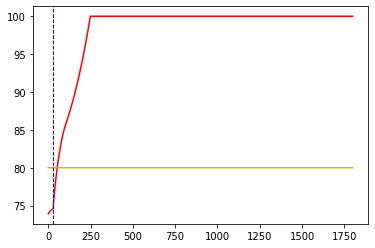

In [25]:
# KLAMPO271
# ZVCT
# CZVCT6
plt.plot(db['ZVCT'], color='r')
plt.plot(db['CZVCT6'], color='y')
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

In [27]:
vct_level = []
for i in range(len(db)):
    if i > 29:
        if db['ZVCT'][i] > db['CZVCT6'][i]:
            vct_level.append(i+1)
if len(vct_level) == 0:
    print('증상을 만족하지 못했습니다.')
else:
    print(f'최초 VCT 수위 high 경보 시간 : {vct_level[0]}초')

최초 VCT 수위 high 경보 시간 : 54초


### 2.4 REGEN HX LETDN LINE TEMP HIGH(JP005)

둘 중에 어느 알람인 확인 필요
1. L/D HX outlet temp hi
2. RHX L/D outlet temp hi

1. L/D HX outlet temp hi

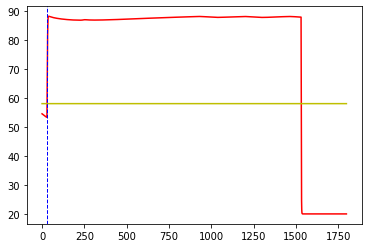

In [39]:
# KLAMPO261 :NRHX OUTLET TEMPERATURE
# UNRHXUT : NRHX OUTLET TEMPERATURE.
# CULDHX : L/D HX OUTLET TEMPERATURE HIGH SETPOINT
plt.plot(db['UNRHXUT'], color='r')
plt.plot(db['CULDHX'], color='y')
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

In [40]:
line_temp = []
for i in range(len(db)):
    if i > 29:
        if db['UNRHXUT'][i] > db['CULDHX'][i]:
            line_temp.append(i+1)
if len(line_temp) == 0:
    print('증상을 만족하지 못했습니다.')
else:
    print(f'최초 재생열교환기 letdown line 온도 고 경보 시간 : {line_temp[0]}초')

최초 재생열교환기 letdown line 온도 고 경보 시간 : 31초


2. RHX L/D outlet temp hi

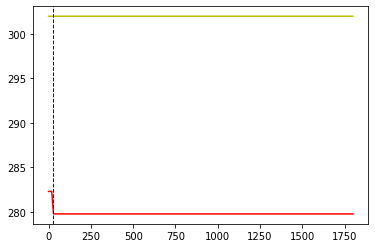

In [76]:
# KLAMPO262 :ALARM: RHX L/D OUTLET TEMP HIGH(202 DEG C)  
# URHXUT : RHX OUTLET TEMPERATURE..
# CURHX : RHX OUTLET TEMPERATURE HIGH SETPOINT
plt.plot(db['URHXUT'], color='r')
plt.plot(db['CURHX'], color='y')
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

In [43]:
line_temp_ = []
for i in range(len(db)):
    if i > 29:
        if db['URHXUT'][i] > db['CURHX'][i]:
            line_temp_.append(i+1)
if len(line_temp_) == 0:
    print('증상을 만족하지 못했습니다.')
else:
    print(f'최초 재생열교환기 letdown line 온도 고 경보 시간 : {line_temp_[0]}초')

증상을 만족하지 못했습니다.


REGEN HX LETDN LINE TEMP HIGH(JP005)알람에 해당하는 경보가 어느 것인지 확인이 필요할 것으로 보입니다.

### 2.5 RCP SEAL INJ WTR FLOW LOW(JP005) => 불만족

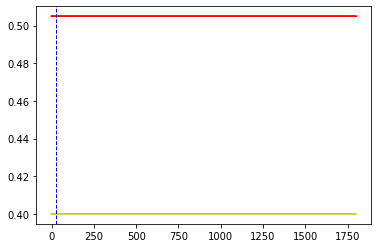

In [50]:
# KLAMPO265 : ALARM: RCP SEAL INJ WTR FLOW LOW(1.4 M3/HR)  
# WRCPSI1 : SEAL INJECTION FLOW TO RCP #1
# WRCPSI2 : SEAL INJECTION FLOW TO RCP #2
# WRCPSI3 : SEAL INJECTION FLOW TO RCP #3
# CWRCPS : RCP SEAL INJECTION FLOW LOW SETPOINT
plt.plot(db['WRCPSI1'], color='r')
plt.plot(db['WRCPSI2'], color='r')
plt.plot(db['WRCPSI3'], color='r')
plt.plot(db['CWRCPS'], color='y')
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

In [51]:
print(db['CWRCPS'])

0       0.4
1       0.4
2       0.4
3       0.4
4       0.4
       ... 
1795    0.4
1796    0.4
1797    0.4
1798    0.4
1799    0.4
Name: CWRCPS, Length: 1800, dtype: float64


※ 알람 setpoint가 1.4 M3/HR이나 CWRCPS변수치는 0.4를 나타낸다. (단위 확인)

1 cubic meter per hour ≈ 4.4029 gallons per minute. (계산결과 다름)

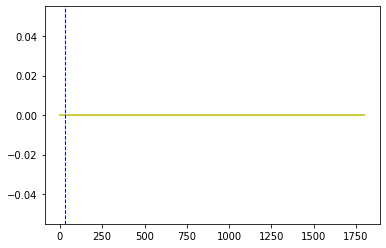

In [52]:
plt.plot(db['KLAMPO265'], color='y')
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

In [49]:
rcp_seal = []
for i in range(len(db)):
    if i > 29:
        if db['WRCPSI1'][i] < db['CWRCPS'][i] or db['WRCPSI2'][i] < db['CWRCPS'][i] or db['WRCPSI3'][i] < db['CWRCPS'][i]:
            rcp_seal.append(i+1)
if len(rcp_seal) == 0:
    print('증상을 만족하지 못했습니다.')
else:
    print(f'최초 RCP SEAL INJ WTR FLOW LOW 경보 발생 시간 : {rcp_seal[0]}초')

증상을 만족하지 못했습니다.


### 2.6 1E RAD WARN ＆ HIGH ALARM(JP004)
NON-1E RAD WARN ＆ HIGH ALARM(JP004) 
(격납건물:GT-RE001/002/119/211/132/133/220  JP014)
(보조건물:GL-RE015/069/087  JP014)

관련 경보 확인불가.

### 2.7 충전유량 지시계 지시치 증가(BG-FI122A  JP001)

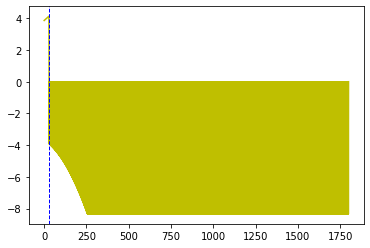

In [62]:
# WCHGNO : NORMAL CHARGING FLOW (지시계변수)
plt.plot(db['WCHGNO'], color='y')
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

CNS상 추전유량 지시치가 증가하는것으로 확인.

data상으로는 위의 그래프와 같은 형상을 나타냄

데이터 확인이 필요함.

### 2.8 가압기 수위 지시계 지시치 감소(BB-LI459A/460/461/460B  JP001/005) 

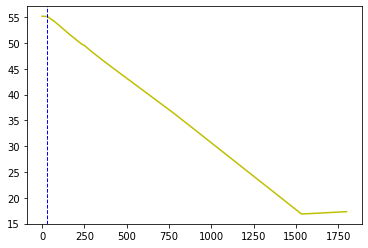

In [64]:
# ZINST63 : 가압기 수위
plt.plot(db['ZINST63'], color='y')
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

In [66]:
pzr_level = []
for i in range(len(db)):
    if i > 29:
        sym_ch[0].append(db['ZINST63'][i])
        if len(sym_ch[0]) == 5:
            if sym_ch[0][0] > sym_ch[0][1] > sym_ch[0][2]:
                pzr_level.append(i+1)
if len(pzr_level) == 0:
    print('증상을 만족하지 못했습니다.')
else:
    print(f'최초 가압기 수위 증가 시간 : {pzr_level[0]}초')

최초 가압기 수위 증가 시간 : 35초


### 2.9 체적제어탱크 수위 지시계 지시치 감소(BG-LI115/112A  JP001/005)

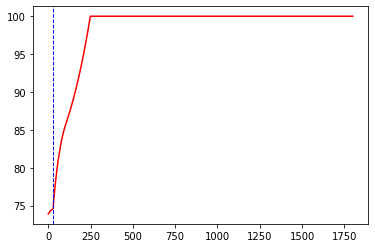

In [8]:
# ZVCT : VCT 수위
plt.plot(db['ZVCT'], color='r')
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

In [70]:
vct_level = []
for i in range(len(db)):
    if i > 29:
        sym_ch[2].append(db['ZVCT'][i])
        if len(sym_ch[1]) == 5:
            if sym_ch[1][0] > sym_ch[1][1] > sym_ch[1][2]:
                vct_level.append(i+1)
if len(vct_level) == 0:
    print('증상을 만족하지 못했습니다.')
else:
    print(f'최초 체적제어탱크 수위감소 시간 : {vct_level[0]}초')

증상을 만족하지 못했습니다.


### 2.10 재생 열교환기 후단 유출수 온도 지시계 지시치 증가(BG-TI140  JP001) (재생 열교환기 전단 충전수 관로 누설시)

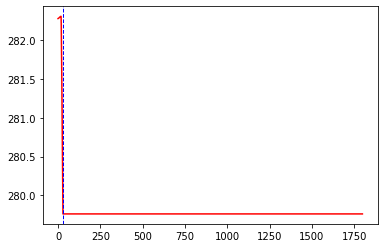

In [9]:
# UCHGUT : CHARGING LINE OUTLET TEMPERATURE
plt.plot(db['UCHGUT'], color='r')
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

In [22]:
outlet_temp = []
for i in range(len(db)):
    if i > 29:
        sym_ch[2].append(db['UCHGUT'][i])
        if len(sym_ch[2]) == 5:
            if sym_ch[2][0] < sym_ch[2][1] < sym_ch[2][2]:
                outlet_temp.append(i+1)
if len(outlet_temp) == 0:
    print('증상을 만족하지 못했습니다.')
else:
    print(f'최초 재생 열교환기 후단 유출수 온도 지시계 지시치 증가 시간 : {outlet_temp[0]}초')

증상을 만족하지 못했습니다.


### 2.11 재생 열교환기 후단 충전수 온도 지시계 지시치 감소(BG-TI123  JP001) (재생 열교환기 후단 충전수 관로 누설시)   

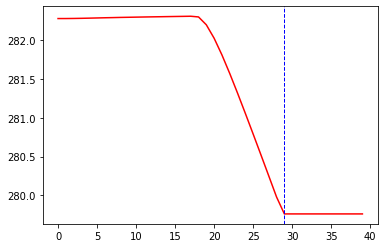

In [14]:
# UCHGUT : CHARGING LINE OUTLET TEMPERATURE
plt.plot(db['UCHGUT'].iloc[:40], color='r')
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

In [23]:
outlet_temp_ = []
for i in range(len(db)):
    if i > 29:
        sym_ch[2].append(db['UCHGUT'][i])
        if len(sym_ch[3]) == 5:
            if sym_ch[3][0] > sym_ch[3][1] > sym_ch[3][2]:
                outlet_temp_.append(i+1)
if len(outlet_temp_) == 0:
    print('증상을 만족하지 못했습니다.')
else:
    print(f'최초 재생 열교환기 후단 유출수 온도 지시계 지시치 감소 시간 : {outlet_temp_[0]}초')

증상을 만족하지 못했습니다.


mal function 주입시간 확인이 필요한 것으로 보입니다.

20초부터 급격한 감소

### 2.12 RCP 밀봉수 주입유량 지시계 지시치 감소(BG-FR154A/155A/156A  JP005)

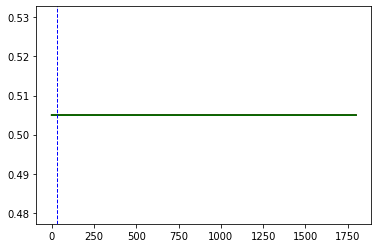

In [16]:
# WRCPSI1 : SEAL INJECTION FLOW TO RCP #1
# WRCPSI2 : SEAL INJECTION FLOW TO RCP #2
# WRCPSI3 : SEAL INJECTION FLOW TO RCP #3
plt.plot(db['WRCPSI1'], color='r')
plt.plot(db['WRCPSI2'], color='k')
plt.plot(db['WRCPSI3'], color='g')
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

In [24]:
seal_flow_ = []
for i in range(len(db)):
    if i > 29:
        sym_ch[4].append(db['WRCPSI1'][i])
        sym_ch[5].append(db['WRCPSI2'][i])
        sym_ch[6].append(db['WRCPSI3'][i])
        if len(sym_ch[4]) == 5:
            if sym_ch[4][0] > sym_ch[4][1] > sym_ch[4][2]:
                seal_flow_.append(i+1)
            elif sym_ch[5][0] > sym_ch[5][1] > sym_ch[5][2]:
                seal_flow_.append(i+1)
            elif sym_ch[6][0] > sym_ch[6][1] > sym_ch[6][2]:
                seal_flow_.append(i+1)            
if len(seal_flow_) == 0:
    print('증상을 만족하지 못했습니다.')
else:
    print(f'최초 RCP seal 주입유량 지시계 지시치 감소 시간 : {seal_flow_[0]}초')

증상을 만족하지 못했습니다.


### 2.13 격납건물 외부에서 누설 시 보조건물 배수조 수위 증가

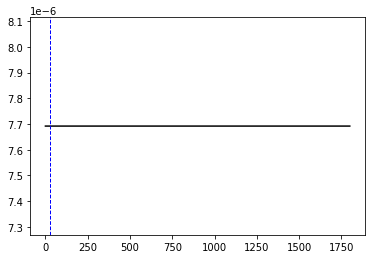

In [26]:
# ZSUMP : 배수조 수위
plt.plot(db['ZSUMP'], color='k')
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

In [25]:
sump_level = []
for i in range(len(db)):
    if i > 29:
        sym_ch[7].append(db['ZSUMP'][i])
        if len(sym_ch[7]) == 5:
            if sym_ch[7][0] < sym_ch[7][1] < sym_ch[7][2]:
                sump_level.append(i+1)
if len(sump_level) == 0:
    print('증상을 만족하지 못했습니다.')
else:
    print(f'최초 보조건물 배수조 수위 증가 시간 : {sump_level[0]}초')

증상을 만족하지 못했습니다.


### 2.14 격납건물 내부에서 누설 시 격납건물 배수조 수위 및 온도/습도 증가

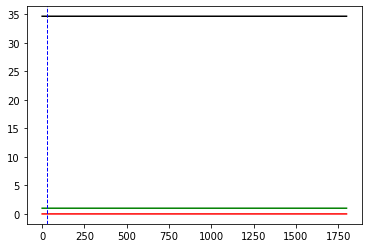

In [30]:
# UCTMT : 격납건물 온도
# HUCTMT : 격납건물 습도
# ZSUMP : 배수조 수위
plt.plot(db['ZSUMP'], color='r')
plt.plot(db['UCTMT'], color='k')
plt.plot(db['HUCTMT'], color='g')
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

In [33]:
temp_humidity = []
for i in range(len(db)):
    if i > 29:
        sym_ch[8].append(db['UCTMT'][i])
        sym_ch[9].append(db['HUCTMT'][i])
        if len(sym_ch[7]) == 5:
            if sym_ch[7][0] < sym_ch[7][1] < sym_ch[7][2] and sym_ch[8][0] < sym_ch[8][1] < sym_ch[8][2] and sym_ch[9][0] < sym_ch[9][1] < sym_ch[9][2]:
                temp_humidity.append(i+1)
if len(temp_humidity) == 0:
    print('증상을 만족하지 못했습니다.')
else:
    print(f'최초 보조건물 배수조 수위 및 온도/습도 증가 시간 : {temp_humidity[0]}초')

증상을 만족하지 못했습니다.


## 3.0 자동동작사항

### 3.1 가압기 수위지시계 및 기록계(BB-LI459A/460, BB-LR459) 지시치 17%이하로 감소되면 다음과 같은 자동 동작이 발생한다.

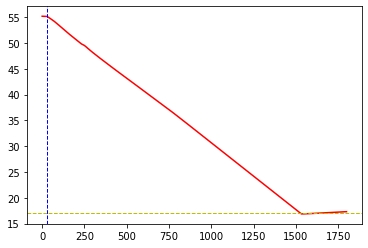

In [6]:
# ZINST63
plt.plot(db['ZINST63'], color='r')
vline = plt.axhline(17, color='y', linestyle='--', linewidth=1)
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

In [10]:
low_level = []
for i in range(len(db)):
    if i > 29:
        if db['ZINST63'][i] < 17:
            low_level.append(i+1)
if len(low_level) == 0:
    print('증상을 만족하지 못했습니다.')
else:
    print(f'최초 가압기 주위지시계 지시치 17% 이하로 감소 시간 : {low_level[0]}초')

최초 가압기 주위지시계 지시치 17% 이하로 감소 시간 : 1529초


### 3.1.1 모든 가압기 전열기 꺼짐(OFF)

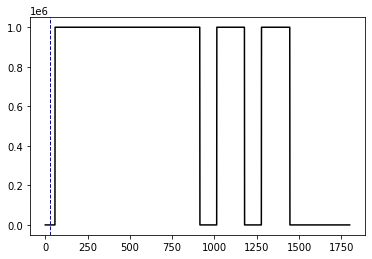

In [13]:
# QPRZB :  back-up heaters power.
plt.plot(db['QPRZB'], color='k')
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

꺼졌다 켜졌다 반복합니다. 최종적으로 꺼졌을때의 시간을 측정할 방법을 확인할 필요가 있습니다.

### 3.1.2 유출수 오리피스차단밸브(BG-HV1/2/3) 자동 닫힘

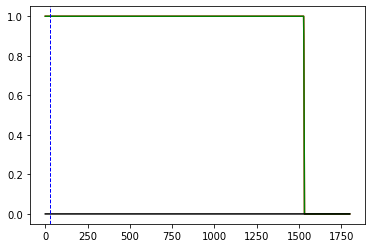

In [18]:
# BHV3
plt.plot(db['BHV1'], color='r')
plt.plot(db['BHV2'], color='g')
plt.plot(db['BHV3'], color='k')
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

In [19]:
ld_valve = []
for i in range(len(db)):
    if i > 29:
        if db['BHV1'][i] == 0 and db['BHV2'][i] == 0 and db['BHV3'][i] == 0:
            ld_valve.append(i+1)
if len(ld_valve) == 0:
    print('증상을 만족하지 못했습니다.')
else:
    print(f'유출수 오리피스차단밸브 닫힘 시간 : {ld_valve[0]}초')

유출수 오리피스차단밸브 닫힘 시간 : 1533초


### 3.1.3 유출수 차단밸브(BG-LV459/460) 자동 닫힘

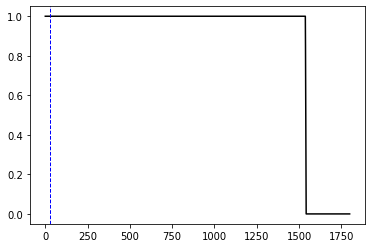

In [20]:
# BLV459
plt.plot(db['BLV459'], color='k')
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

In [21]:
ld_relf_valve = []
for i in range(len(db)):
    if i > 29:
        if db['BLV459'][i] == 0:
            ld_relf_valve.append(i+1)
if len(ld_relf_valve) == 0:
    print('증상을 만족하지 못했습니다.')
else:
    print(f'유출수 차단밸브 닫힘 시간 : {ld_relf_valve[0]}초')

유출수 차단밸브 닫힘 시간 : 1543초


### 3.1.4 충전수 유량 조절밸브(BG-FV122) 완전 열림

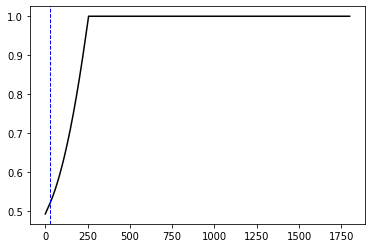

In [22]:
# BFV122
plt.plot(db['BFV122'], color='k')
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

In [24]:
charging_flow_valve = []
for i in range(len(db)):
    if i > 29:
        if db['BFV122'][i] == 1:
            charging_flow_valve.append(i+1)
if len(charging_flow_valve) == 0:
    print('증상을 만족하지 못했습니다.')
else:
    print(f'충전수 유량 조절밸브 완전 열림 시간 : {charging_flow_valve[0]}초')

충전수 유량 조절밸브 완전 열림 시간 : 257초


### 3.1.5 유출수 열교환기 출구온도 증가에 따라 기기냉각수 조절밸브(EG-TV144) 서서히 열림

해당 변수 확인 불가

### 3.1.6 저압 유출수 압력조절밸브(BG-PV145) 자동 닫힘

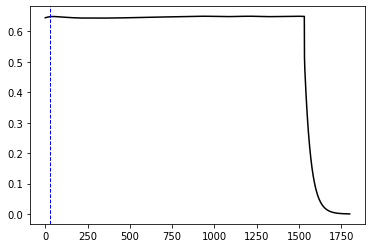

In [25]:
# BPV145
plt.plot(db['BPV145'], color='k')
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

In [30]:
db['BPV145'].iloc[50:80]

50    0.648734
51    0.648722
52    0.648708
53    0.648692
54    0.648674
55    0.648654
56    0.648631
57    0.648607
58    0.648580
59    0.648553
60    0.648524
61    0.648496
62    0.648467
63    0.648437
64    0.648406
65    0.648374
66    0.648342
67    0.648308
68    0.648274
69    0.648239
70    0.648203
71    0.648167
72    0.648131
73    0.648094
74    0.648056
75    0.648018
76    0.647980
77    0.647942
78    0.647903
79    0.647863
Name: BPV145, dtype: float64

In [31]:
ld_press_valve = []
for i in range(len(db)):
    if i > 29:
        if db['BPV145'][i] <= 0.01:
            ld_press_valve.append(i+1)
if len(ld_press_valve) == 0:
    print('증상을 만족하지 못했습니다.')
else:
    print(f'충전수 유량 조절밸브 완전 열림 시간 : {ld_press_valve[0]}초')

충전수 유량 조절밸브 완전 열림 시간 : 1679초


충전수 유량 조절밸브FV122는 완전히 닫히지 않습니다.

### 3.1.7 원자로보충수계통의 빈번한 자동 동작

## 4.0 긴급 조치사항

### 4.1 원자로 보충수 제어선택스위치(BG-HS71)를 "자동"(AUTO)위치에 놓고 보충수 제어스위치(BG-HS70)를 "시작"(START) 위치에 놓아 체적제어탱크 수위를 정상상태로 회복시킨다. 

### 4.2 유출수 오리피스차단밸브(BG-HV1/BG-HV2/BG-HV3)를 닫고 유출수 차단밸브(BG-LV459/BG-LV460)를 닫음으로써  유출수를 차단한다.

### 4.3 충전수 차단밸브(BG-HV36/BG-HV37)를 닫는다.

### 4.4 충전수 유량조절 밸브(BG-FV122)를 서서히 닫는다.

### 4.5 초과 유출수 전환밸브(BG-HV43)를 "VCT"위치로 놓는다.

※ 주의사항 : 초과 유출수 조절밸브(BG-HV137)를 열 때는 원자로 냉각재 펌프의 밀봉계통으로의 배압효과 때문에 매우 서서히 열어야 한다.

### 4.6 초과 유출수 차단밸브(BG-HV41/BG-HV42)를 열고 초과 유출수 조절밸브(BG-HV137)를 서서히 열어 가압기 수위를 유지한다.

### 4.7 가압기 수위와 원자로 냉각재 펌프의 밀봉수 유량을 유지하기 위하여 초과 유출수 조절밸브(BG-HV137)를 수시로 조절한다.

### 4.8 원자로냉각재펌프 밀봉수 주입유량(BG-FR156A/155A/154A)이 각각 0.5～0.82ℓ/s가 되도록 밀봉수 주입유량 제어밸브(BG-HV186)를 조절한다.

### 4.9 방사선비상계획서의 비상 발령기준을 확인 후 필요한 조치를 한다.